## Observations and Insights

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files (renamed to resources for familiarity lol)
mouse_file_to_read = "Resources/Mouse_metadata.csv"
study_file_to_read = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_file_to_read)
study_results = pd.read_csv(study_file_to_read)

#Combine the data into a single dataset, merge on Mouse ID
combined_data = pd.merge(mouse_metadata, study_results, how = "outer", on = "Mouse ID")
combined_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
## Generate a summary statistics table
#Create inital summary table
summarystats = pd.DataFrame(combined_data.groupby("Drug Regimen").count())

#Use groupby to create summary stats
summarystats["Mean"] = pd.DataFrame(combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean())
summarystats["Median"] = pd.DataFrame(combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median())
summarystats["Standard Deviation"] = pd.DataFrame(combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std())
summarystats["Variance"] = pd.DataFrame(combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var())
summarystats["SEM"] = pd.DataFrame(combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem())

#Cleaning time
summarystats = summarystats[["Mouse ID", "Mean", "Median", "Standard Deviation", "Variance", "SEM"]]


summarystats.head()


,Mouse ID,Mean,Median,Standard Deviation,Variance,SEM
Drug Regimen,,,,,,
Capomulin,230,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,178,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,178,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,188,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,186,54.331565,52.509285,8.134708,66.173479,0.596466


## Bar plots

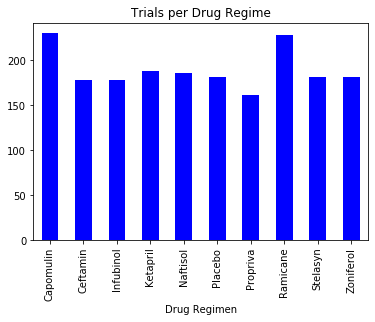

<Figure size 432x288 with 0 Axes>

In [5]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

datapoints = summarystats[["Mouse ID"]]

# create a bar chart of the data
datapoints.plot(kind="bar", figsize=(6,4), color = "b", legend=False)

# Set a title for the chart
plt.title("Trials per Drug Regime")

plt.show()
plt.tight_layout()

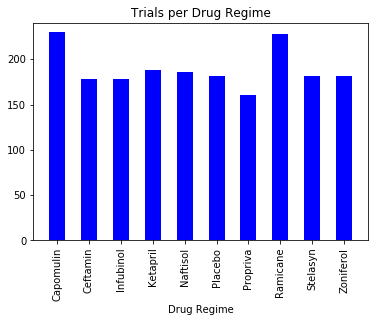

In [7]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

# Set x axis and tick locations
x_axis = np.arange(len(datapoints))
tick_locations = [value for value in x_axis]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(6,4))
plt.bar(x_axis, datapoints["Mouse ID"], color = "b", width = .5)
plt.xticks(tick_locations, datapoints.index.values, rotation="vertical")

# Set x and y limits
plt.xlim(-0.75, len(x_axis)-.25)
plt.ylim(0, max(datapoints["Mouse ID"])+10)

# Set a Title and labels
plt.title("Trials per Drug Regime")
plt.xlabel("Drug Regime")


# Save our graph and show the grap
plt.show()

## Pie plots

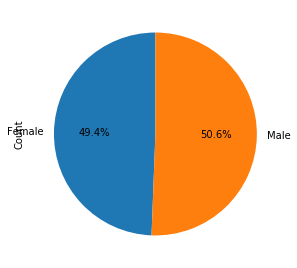

In [30]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_df = pd.DataFrame(combined_data.groupby(["Sex"]).count()).reset_index()
gender_df.head()

# Filter the DataFrame down only to those columns to chart
gender_df = gender_df[["Sex","Mouse ID"]]
gender_df = gender_df.rename(columns={"Mouse ID": "Count"})
gender_df.head()

# plot chart
plt.figure(figsize=(10,6))
ax1 = plt.subplot(121, aspect='equal')
gender_df.plot(kind='pie', y = "Count", ax=ax1, autopct='%1.1f%%', 
 startangle=90, shadow=False, labels=gender_df['Sex'], legend = False)

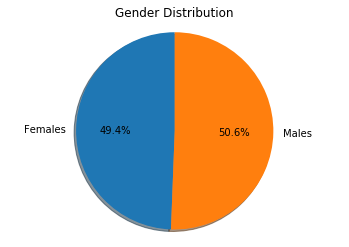

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
import matplotlib.pyplot as plt
gender_count = (combined_data.groupby(["Sex"])["Age_months"].count()).tolist()
gender_count
labels = ["Females", "Males"]

plt.pie(gender_count, labels=labels,
        autopct="%1.1f%%", shadow=True, startangle=90)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")

# Set a title for the chart
plt.title("Gender Distribution")

# Save an image of our chart and print the final product to the screen
plt.show()

In [21]:
# Grab just data for the 4 smallest mean tumor volume regimens
filtered_df = combined_data.loc[(combined_data["Drug Regimen"] == "Capomulin") | (combined_data["Drug Regimen"] == "Ramicane") | (combined_data["Drug Regimen"] == "Ceftamin") | (combined_data["Drug Regimen"] == "Propriva"), :]

# Sort by Timpepoints based on the latest values
filtered_df = filtered_df.sort_values("Timepoint", ascending = False)

# Dropping duplicates, keeping first value, should be the latest timepoint per mouse
filtered_df = filtered_df.drop_duplicates(subset="Mouse ID", keep='first')
    
# Determine quartiles
quartiles = filtered_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

# Determine upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

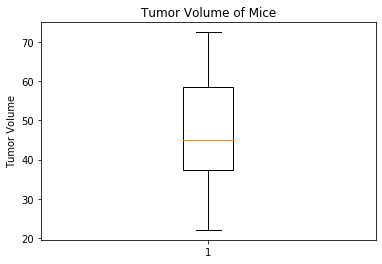

In [22]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

Tumor_Volume = filtered_df['Tumor Volume (mm3)']
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume of Mice')
ax1.set_ylabel('Tumor Volume')
ax1.boxplot(Tumor_Volume)
plt.show()

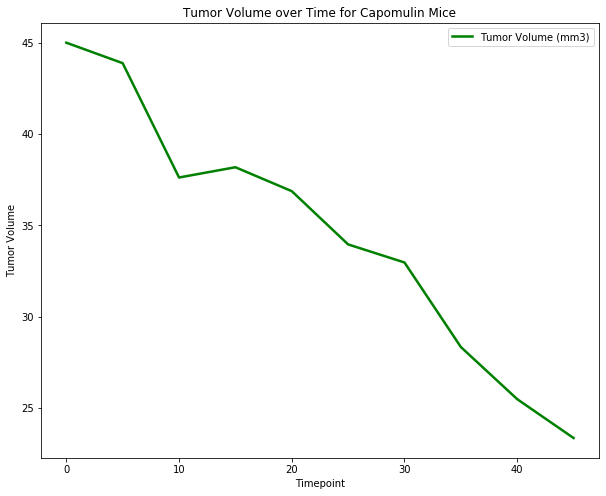

In [27]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

# Filter original data for just the Capomulin Drug Regime
Capomulin_df = combined_data.loc[(combined_data["Drug Regimen"] == "Capomulin"),:]
capomulin_df = combined_data.loc[combined_data["Drug Regimen"] == "Capomulin"]
capomulin_df = capomulin_df.reset_index()
capomulin_df.head()

cap_single_df = capomulin_df.loc[capomulin_df["Mouse ID"] == "s185"]
cap_single_df


cap_single_df = cap_single_df.loc[:, ["Timepoint", "Tumor Volume (mm3)"]]
#capomulin_df.index
#Reset the index
cap_single_df = cap_single_df.reset_index(drop=True)
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
cap_single_df.set_index('Timepoint').plot(figsize=(10, 8), linewidth=2.5, color='green')

# Show the chart, add labels
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume')
plt.title('Tumor Volume over Time for Capomulin Mice')
plt.show()


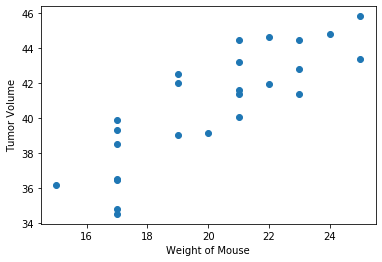

In [123]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

mouse_weight = Capomulin_df.groupby(Capomulin_df["Mouse ID"])["Weight (g)"].mean()
tumor_volume = Capomulin_df.groupby(Capomulin_df["Mouse ID"])["Tumor Volume (mm3)"].mean()

# Scatter Plot
plt.scatter(mouse_weight,tumor_volume)
plt.xlabel("Weight of Mouse")
plt.ylabel("Tumor Volume")
plt.show()

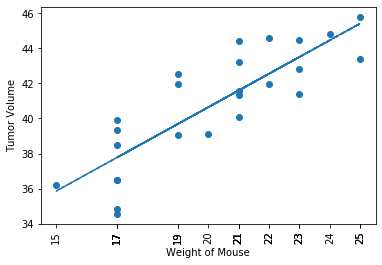

The correlation between weight and tumor value is 0.84


In [124]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen 

mouse_weight = Capomulin_df.groupby(Capomulin_df["Mouse ID"])["Weight (g)"].mean()
tumor_volume = Capomulin_df.groupby(Capomulin_df["Mouse ID"])["Tumor Volume (mm3)"].mean()

# Perform a linear regression on year versus violent crime rate
slope, int, r, p, std_err = st.linregress(mouse_weight, tumor_volume)
      
# Create equation of line to calculate predicted violent crime rate
fit = slope * mouse_weight + int

# Plot the linear model on top of scatter plot 
plt.scatter(mouse_weight,tumor_volume)
plt.xlabel("Weight of Mouse")
plt.ylabel("Tumor Volume")
plt.plot(mouse_weight,fit,"--")
plt.xticks(mouse_weight, rotation=90)
plt.show()

# Caculate correlation coefficient
corr = round(st.pearsonr(mouse_weight,tumor_volume)[0],2)
print(f'The correlation between weight and tumor value is {corr}')
